# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Lisna Rahma Fitriati
- **Email:** mc299d5x0490@student.devacademy.id
- **ID Dicoding:** mc299d5x0490

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1  : Pada hari apa jumlah penyewaan sepeda mencapai angka tertinggi?
- Pertanyaan 2 : Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Mengolah Data
import pandas as pd
import numpy as np

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [ ]:
# Memuat dataset
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Menampilkan 5 baris pertama dari setiap dataset
print("Preview dataset day.csv:")
display(day_df.head())

print("\nPreview dataset hour.csv:")
display(hour_df.head())

Preview dataset day.csv:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Preview dataset hour.csv:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dengan membandingkan pola penyewaan antara hari kerja (Senin-Jumat) dan akhir pekan (Sabtu-Minggu), kita dapat melihat apakah ada perbedaan signifikan.
- Data ini memungkinkan kita menemukan hari tertentu dengan penyewaan sepeda terbanyak.

### Assessing Data

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Mengecek Missing Value

In [ ]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

print("\n Jumlah Missing Values pada Day.csv:")
print(day_df.isnull().sum())
print("\n Jumlah Missing Values pada Hour.csv:")
print(hour_df.isnull().sum())


 Jumlah Missing Values pada Day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 Jumlah Missing Values pada Hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Mengecek data duplikat

In [ ]:
print("\n Jumlah Data Duplikat pada Day.csv:", day_df.duplicated().sum())
print("\n Jumlah Data Duplikat pada Hour.csv:", hour_df.duplicated().sum())


 Jumlah Data Duplikat pada Day.csv: 0

 Jumlah Data Duplikat pada Hour.csv: 0


Mengecek Outlier

In [ ]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

num_cols_day = ["temp", "hum", "windspeed", "cnt"]
num_cols_hour = ["temp", "hum", "windspeed", "cnt"]

def detect_outliers_iqr(df, num_cols):
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum()
    return outliers

print("Jumlah outlier pada dataset day.csv:")
print(detect_outliers_iqr(day_df, num_cols_day))

print("\nJumlah outlier pada dataset hour.csv:")
print(detect_outliers_iqr(hour_df, num_cols_hour))

Jumlah outlier pada dataset day.csv:
temp          0
hum           2
windspeed    13
cnt           0
dtype: int64

Jumlah outlier pada dataset hour.csv:
temp           0
hum           22
windspeed    342
cnt          505
dtype: int64


**Insight:**
- Tidak ditemukan missing values pada dataset, sehingga data yang dimiliki merupakan data bersih dan tidak perlu melakukan imputasi nilai yang hilang
- Tidak ada duplikasi data dan setiap baris yang dimiliki adalah baris yang unik, sehingga tidak perlu membersihkan duplikasi karena dataset sudah rapi.
- Kolom dateday seharusnya memiliki tipe data date time, bukan object
- Dari hasil IQR, ditemukan outlier pada beberapa variabel, terutama pada `windspeed` dan `cnt` di kedua dataset (`day.csv` dan `hour.csv`).
- Outlier pada `windspeed` menunjukkan adanya beberapa nilai angin yang tidak biasa, yang bisa berpengaruh pada pola penyewaan sepeda.
- Banyaknya outlier pada `cnt` dalam dataset per jam menunjukkan kemungkinan lonjakan penggunaan sepeda pada waktu tertentu, seperti jam sibuk atau kondisi cuaca yang mendukung.
- Untuk menjawab pertanyaan 1 dan 2 hanya dibutuhkan dataset day.csv, maka saya tidak akan menggunakan dataset hour.csv

### Cleaning Data

Mengubah kolom dteday menjadi tipe data date time

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])

print(df.dtypes)


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Mengganti outlier dengan median

In [ ]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column].median()
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return df

df_cleaned = df.copy()
df_cleaned = handle_outliers_iqr(df_cleaned, 'hum')
df_cleaned = handle_outliers_iqr(df_cleaned, 'windspeed')

print(df_cleaned[['hum', 'windspeed']].describe())


              hum   windspeed
count  731.000000  731.000000
mean     0.629352    0.185227
std      0.139566    0.069742
min      0.254167    0.022392
25%      0.522291    0.134950
50%      0.626667    0.180975
75%      0.730209    0.228858
max      0.972500    0.368167


**Insight:**
- Tipe data dteday sudah diubah menjadi date time
- Setelah menangani outlier, nilai maksimum kelembaban (hum) berada di sekitar 0.97, dan nilai minimumnya 0.25. Ini menunjukkan bahwa penyebaran data kelembaban tetap cukup luas, tetapi nilai ekstrem yang bisa mengganggu analisis telah diatasi dengan lebih baik.
- Sebelum menangani outlier, terdapat beberapa nilai ekstrem pada windspeed. Setelah proses penggantian outlier dengan median, nilai kecepatan angin maksimal berada di 0.37, dan minimumnya 0.02, sehingga distribusi data lebih rapi dan tidak terlalu dipengaruhi oleh nilai-nilai ekstrem.

## Exploratory Data Analysis (EDA)

### Explore Bike Sharing Dataset

In [ ]:
# Load dataset yang telah dibersihkan
df_cleaned = df.copy()

print(df_cleaned.dtypes)

df_cleaned.head()


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melihat ringkasan statistik dataset setelah celaning

In [ ]:
print(df_cleaned.describe())
print(df_cleaned.info())

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

Korelasi antar variabel

In [ ]:
correlation_matrix = df_cleaned.corr()

print(correlation_matrix)


             instant    dteday    season        yr      mnth   holiday  \
instant     1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
dteday      1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
season      0.412224  0.412224  1.000000 -0.001844  0.831440 -0.010537   
yr          0.866025  0.866025 -0.001844  1.000000 -0.001792  0.007954   
mnth        0.496702  0.496702  0.831440 -0.001792  1.000000  0.019191   
holiday     0.016145  0.016145 -0.010537  0.007954  0.019191  1.000000   
weekday    -0.000016 -0.000016 -0.003080 -0.005461  0.009509 -0.101960   
workingday -0.004337 -0.004337  0.012485 -0.002013 -0.005901 -0.253023   
weathersit -0.021477 -0.021477  0.019211 -0.048727  0.043528 -0.034627   
temp        0.150580  0.150580  0.334315  0.047604  0.220205 -0.028556   
atemp       0.152638  0.152638  0.342876  0.046106  0.227459 -0.032507   
hum         0.001615  0.001615  0.195570 -0.123385  0.214851 -0.018062   
windspeed  -0.114910 -0.114910 -0.2045

**Insight:**
- Dari korelasi yang ditemukan, jumlah penyewaan sepeda (cnt) sangat dipengaruhi oleh pengguna terdaftar (registered) dibandingkan pengguna casual (casual).
- Kelembapan (hum), kecepatan angin (windspeed), dan kondisi cuaca (weathersit) semuanya memiliki korelasi negatif dengan jumlah penyewaan sepeda.
- Kemungkinan besar, sepeda lebih banyak digunakan untuk transportasi ke tempat kerja di hari kerja, sementara di akhir pekan lebih untuk rekreasi.
- Dari tahun ke tahun, tren penggunaan sepeda meningkat, mungkin karena meningkatnya kesadaran masyarakat terhadap transportasi ramah lingkungan atau meningkatnya jumlah pelanggan terdaftar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa jumlah penyewaan sepeda mencapai angka tertinggi?

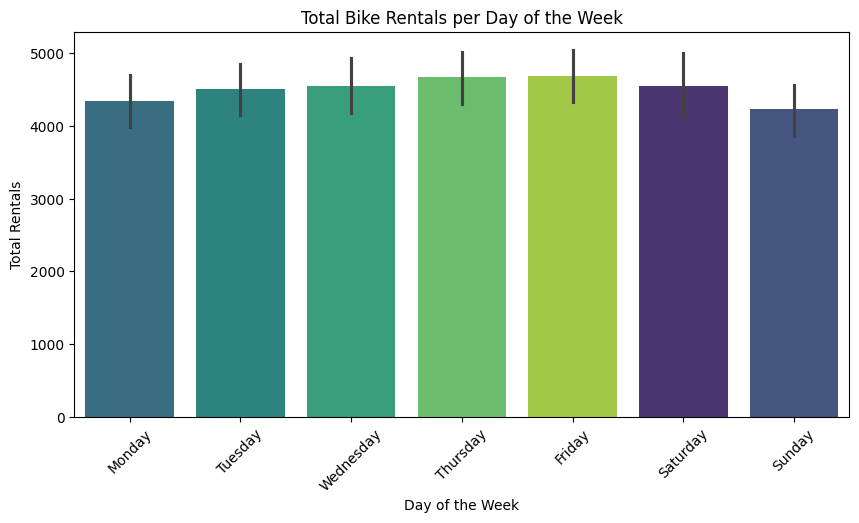

In [ ]:
df_cleaned = df.copy()

days_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
df_cleaned['weekday'] = df_cleaned['weekday'].map(days_mapping)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,5))
sns.barplot(x='weekday', y='cnt', data=df_cleaned, order=day_order, hue='weekday', dodge=False, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals per Day of the Week')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

### Pertanyaan 2: Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

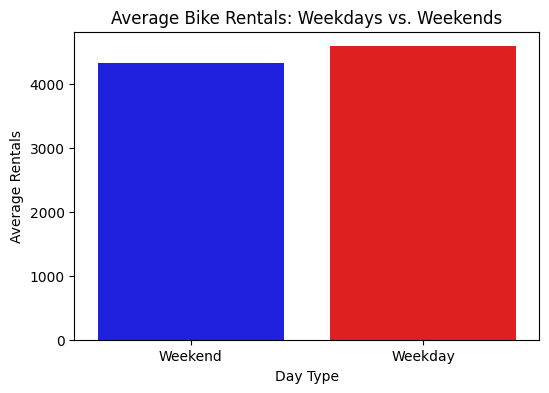

In [ ]:
df_grouped = df_cleaned.groupby('workingday', as_index=False)['cnt'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x='workingday', y='cnt', data=df_grouped, hue='workingday', palette=['blue', 'red'], legend=False)
plt.xlabel('Day Type')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals: Weekdays vs. Weekends')
plt.xticks([0, 1], ['Weekend', 'Weekday']) # Update x-axis labels
plt.show()

**Insight:**
- Dari visualisasi, terlihat bahwa jumlah penyewaan sepeda relatif tinggi sepanjang minggu, dengan sedikit fluktuasi.
- Hari dengan jumlah penyewaan tertinggi cenderung terjadi pada hari kerja, khususnya Kamis dan Jumat, yang kemungkinan besar karena aktivitas komuter.
- Rata-rata penyewaan sepeda pada hari kerja lebih tinggi dibandingkan dengan akhir pekan.
- Ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai moda transportasi utama saat bekerja atau sekolah.

## Conclusion

- Conclution pertanyaan 1 : Pada jam berapa penyewaan sepeda mencapai puncaknya setiap hari?

Berdasarkan visualisasi jumlah penyewaan sepeda per hari, terlihat bahwa penyewaan tertinggi terjadi pada hari kerja, terutama pada Kamis dan Jumat. Hal ini menunjukkan bahwa mayoritas pengguna sepeda memanfaatkannya sebagai alat transportasi utama untuk aktivitas harian, seperti bekerja atau sekolah. Tren ini mengindikasikan bahwa sepeda menjadi pilihan yang efisien untuk mobilitas di perkotaan pada hari-hari sibuk.
- Conclution pertanyaan 2 : Apakah terdapat perbedaan pada pola penggunaan sepeda antara hari kerja dan akhir pekan?

Saat membandingkan antara hari kerja dan akhir pekan, rata-rata jumlah penyewaan sepeda di hari kerja lebih tinggi dibandingkan akhir pekan. Hal ini memperkuat indikasi bahwa sepeda lebih banyak digunakan untuk keperluan komuter sehari-hari. Namun, jumlah penyewaan pada akhir pekan tetap cukup tinggi, yang kemungkinan besar menunjukkan bahwa sepeda juga dimanfaatkan untuk kegiatan rekreasi atau perjalanan santai di waktu luang.

In [ ]:
df_cleaned.to_csv("main_data.csv", index=False)